# Import libraries

In [22]:
# data manipulation libraries
import numpy as np
import pandas as pd

from pandas.api.types import CategoricalDtype

# model libraries
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Import data

In [23]:
path = '/Users/jeannine/OneDrive/Documents/WGU/D212 - Data Mining II/'

file = 'medical_clean.xlsx'

med = pd.read_excel(path + file, index_col=0)
med.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


# Explore original dataset

In [24]:
#count rows and columns
med.shape

(10000, 49)

In [25]:
#list all columns in the dataset
med.columns

Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip',
       'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children',
       'Age', 'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels',
       'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink',
       'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services', 'Initial_days', 'TotalCharge', 'Additional_charges',
       'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [26]:
#display datatypes for each column to identify continuous variables
med.dtypes

Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
TimeZone               object
Job                    object
Children                int64
Age                     int64
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain               object
Anxiety   

In [27]:
#check for duplicates
med.duplicated().any()

False

In [28]:
med.corr()

,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
Zip,1.000000,-0.029327,-0.900683,0.030955,0.011065,-0.005960,0.009404,-0.003151,0.000838,0.012021,...,0.012904,0.003490,-0.005756,-0.002297,-0.009235,-0.001498,0.004776,0.001881,-0.004036,-0.013274
Lat,-0.029327,1.000000,-0.112348,-0.207572,0.006373,-0.007270,-0.019369,0.001493,0.008380,0.003401,...,-0.010759,-0.002283,0.008614,0.007413,0.014326,-0.015594,-0.001424,0.010723,0.009641,0.001733
Lng,-0.900683,-0.112348,1.000000,-0.031979,-0.014114,0.007493,-0.006665,-0.006389,0.000754,-0.014231,...,-0.008830,0.000079,0.004805,-0.002523,-0.000800,0.003508,-0.003296,-0.007443,0.001077,0.009253
Population,0.030955,-0.207572,-0.031979,1.000000,0.002462,-0.018987,0.005426,0.002651,0.012646,-0.025608,...,0.019188,-0.004820,0.014312,0.023612,-0.001248,-0.004660,0.008705,0.008159,0.010034,-0.000220
Children,0.011065,0.006373,-0.014114,0.002462,1.000000,0.009836,0.007176,0.009487,-0.002292,0.003835,...,0.024100,0.013548,0.002138,0.001674,-0.002094,0.000728,0.012564,-0.008546,0.004156,-0.019753
Age,-0.005960,-0.007270,0.007493,-0.018987,0.009836,1.000000,-0.012228,0.010315,0.006898,0.008555,...,0.016876,0.716854,0.005552,0.003967,0.004709,0.003377,-0.008827,-0.002087,0.009423,-0.003367
Income,0.009404,-0.019369,-0.006665,0.005426,0.007176,-0.012228,1.000000,-0.013115,0.013464,-0.011365,...,-0.014345,-0.009825,-0.003494,-0.008182,-0.003782,-0.004301,-0.010642,0.001021,-0.000502,0.021178
VitD_levels,-0.003151,0.001493,-0.006389,0.002651,0.009487,0.010315,-0.013115,1.000000,0.010210,0.023223,...,-0.001403,0.008290,0.013711,0.003979,-0.012103,-0.009872,0.006605,0.006887,-0.009832,-0.021074
Doc_visits,0.000838,0.008380,0.000754,0.012646,-0.002292,0.006898,0.013464,0.010210,1.000000,-0.002767,...,-0.005043,0.008072,0.003680,0.006024,-0.002718,-0.006538,-0.009434,0.012530,0.008589,0.004571
Full_meals_eaten,0.012021,0.003401,-0.014231,-0.025608,0.003835,0.008555,-0.011365,0.023223,-0.002767,1.000000,...,-0.014306,0.018763,0.003724,-0.002022,0.008246,-0.009019,0.009538,0.004294,0.004087,-0.018382


In [29]:
# Visualizing the correlation matrix

corr = med.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

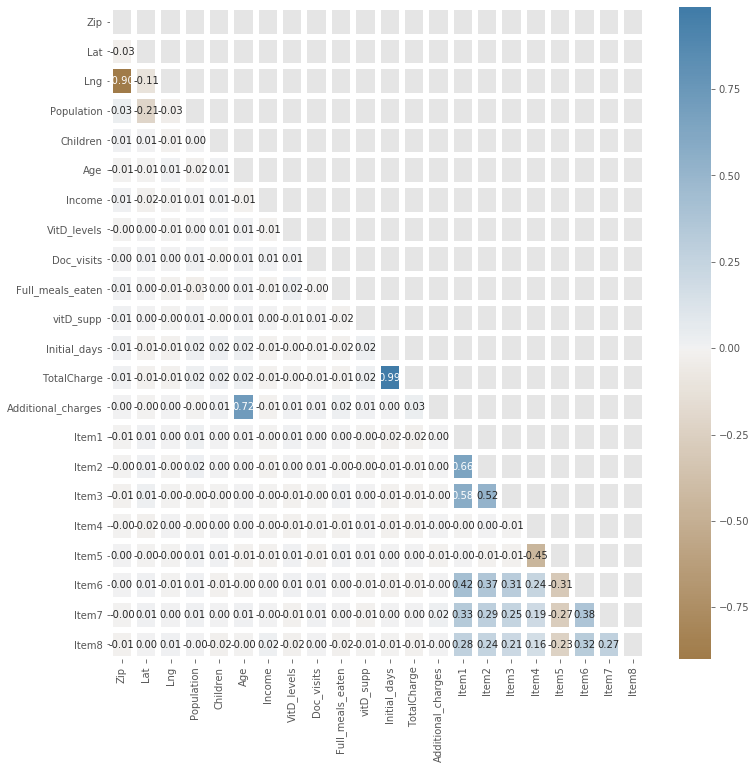

In [30]:
# visualizing the correlation matrix

cmap = sns.diverging_palette(h_neg=50,
                            h_pos=240,
                            as_cmap=True)

fix, ax = plt.subplots(figsize=(12,12))
sns.heatmap(med.corr(), mask=mask, center=0, cmap=cmap, linewidths=5, annot=True, fmt=".2f", ax=ax)

# Drop categorical columns

In [31]:
# drop categorical columns

PCA_numeric_cols = med.select_dtypes(exclude='object')

PCA_numeric_cols


,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,35621,34.34960,-86.72508,2951,1,53,86575.93,19.141466,6,0,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,32446,30.84513,-85.22907,11303,3,51,46805.99,18.940352,4,2,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,57110,43.54321,-96.63772,17125,3,53,14370.14,18.057507,4,1,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,56072,43.89744,-93.51479,2162,0,78,39741.49,16.576858,4,1,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,23181,37.59894,-76.88958,5287,1,22,1209.56,17.439069,5,0,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,27563,36.42886,-78.23716,4762,2,25,45967.61,16.980860,4,2,...,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9997,8340,39.43609,-74.87302,1251,4,87,14983.02,18.177020,5,0,...,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9998,37171,36.36655,-87.29988,532,3,45,65917.81,17.129070,4,2,...,8276.481000,15281.210000,3,3,3,4,4,2,3,2


In [32]:
# check to make sure categorical variables were dropped

PCA_numeric_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Zip                 10000 non-null  int64  
 1   Lat                 10000 non-null  float64
 2   Lng                 10000 non-null  float64
 3   Population          10000 non-null  int64  
 4   Children            10000 non-null  int64  
 5   Age                 10000 non-null  int64  
 6   Income              10000 non-null  float64
 7   VitD_levels         10000 non-null  float64
 8   Doc_visits          10000 non-null  int64  
 9   Full_meals_eaten    10000 non-null  int64  
 10  vitD_supp           10000 non-null  int64  
 11  Initial_days        10000 non-null  float64
 12  TotalCharge         10000 non-null  float64
 13  Additional_charges  10000 non-null  float64
 14  Item1               10000 non-null  int64  
 15  Item2               10000 non-null  int64  
 16  Item

In [33]:
# remove variables not needed to answer PCA question proposed in A1

PCA_numeric_cols = PCA_numeric_cols.drop(['Lat','Lng','Population','Item1','Item2',
                                 'Item3','Item4','Item5','Item6','Item7',
                                 'Item8'], axis=1)

PCA_numeric_cols

,Zip,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
CaseOrder,,,,,,,,,,,
1,35621,1,53,86575.93,19.141466,6,0,0,10.585770,3726.702860,17939.403420
2,32446,3,51,46805.99,18.940352,4,2,1,15.129562,4193.190458,17612.998120
3,57110,3,53,14370.14,18.057507,4,1,0,4.772177,2434.234222,17505.192460
4,56072,0,78,39741.49,16.576858,4,1,0,1.714879,2127.830423,12993.437350
5,23181,1,22,1209.56,17.439069,5,0,2,1.254807,2113.073274,3716.525786
...,...,...,...,...,...,...,...,...,...,...,...
9996,27563,2,25,45967.61,16.980860,4,2,1,51.561220,6850.942000,8927.642000
9997,8340,4,87,14983.02,18.177020,5,0,0,68.668240,7741.690000,28507.150000
9998,37171,3,45,65917.81,17.129070,4,2,0,70.154180,8276.481000,15281.210000


# Explore continuous data

In [34]:
#display mean, count, min, and max for each column

PCA_numeric_cols.describe()

,Zip,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50159.323900,2.097200,53.511700,40490.495160,17.964262,5.012200,1.001400,0.398900,34.455299,5312.172769,12934.528587
std,27469.588208,2.163659,20.638538,28521.153293,2.017231,1.045734,1.008117,0.628505,26.309341,2180.393838,6542.601544
min,610.000000,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,0.000000,1.001981,1938.312067,3125.703000
25%,27592.000000,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,0.000000,7.896215,3179.374015,7986.487755
50%,50207.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,1.000000,0.000000,35.836244,5213.952000,11573.977735
75%,72411.750000,3.000000,71.000000,54296.402500,19.347963,6.000000,2.000000,1.000000,61.161020,7459.699750,15626.490000
max,99929.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,7.000000,5.000000,71.981490,9180.728000,30566.070000


In [35]:
# Visualizing the correlation matrix

corr = PCA_numeric_cols.corr()

mask2 = np.triu(np.ones_like(corr, dtype=bool))

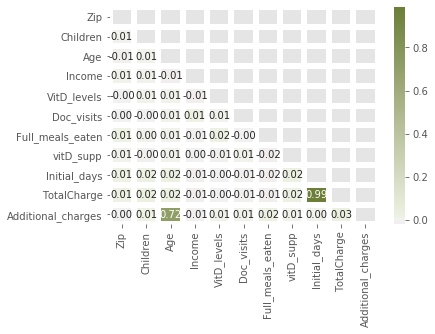

In [36]:
# visualizing the correlation matrix

cmap = sns.diverging_palette(h_neg=10,
                            h_pos=100,
                            as_cmap=True)

sns.heatmap(PCA_numeric_cols.corr(), mask=mask2, center=0, cmap=cmap, linewidths=5, annot=True, fmt=".2f")

# Standardize data

In [67]:
d = PCA_numeric_cols.values
d.shape

(10000, 11)

In [72]:
# Create the object

scaler = StandardScaler()

# calculate the mean to subtract and divide by the standard deviation

scaler.fit(d)
d_scaled = scaler.transform(d)

print(d_scaled)

[[-0.52927808 -0.50712929 -0.02479466 ... -0.9073098  -0.72718477
   0.76500534]
 [-0.64486622  0.417277   -0.1217056  ... -0.73459473 -0.51322759
   0.71511362]
 [ 0.25304433  0.417277   -0.02479466 ... -1.12829151 -1.31998284
   0.6986353 ]
 ...
 [-0.47284922  0.417277   -0.4124384  ...  1.3569578   1.35959679
   0.35869505]
 [ 0.27725413  0.417277   -0.50934933 ...  1.09858493  1.06972732
  -0.78762373]
 [-1.27606851  2.72829274  0.79894828 ...  1.38342919  1.18121275
  -0.19738374]]


In [77]:
d_scaled_df = pd.DataFrame(data=d_scaled, columns={'Zip','Children','Age','Income',
                                                'VitD_levels','Doc_visits',
                                                'Full_meals_eaten','vitD_supp',
                                                'Initial_days',
                                                'TotalCharge','Additional_charges'})
d_scaled_df

,Doc_visits,Full_meals_eaten,Age,vitD_supp,Income,Initial_days,Additional_charges,TotalCharge,VitD_levels,Zip,Children
0,-0.529278,-0.507129,-0.024795,1.615914,0.583603,0.944647,-0.993387,-0.634713,-0.907310,-0.727185,0.765005
1,-0.644866,0.417277,-0.121706,0.221443,0.483901,-0.967981,0.990609,0.956445,-0.734595,-0.513228,0.715114
2,0.253044,0.417277,-0.024795,-0.915870,0.046227,-0.967981,-0.001389,-0.634713,-1.128292,-1.319983,0.698635
3,0.215255,-0.969332,1.186592,-0.026263,-0.687811,-0.967981,-0.001389,-0.634713,-1.244503,-1.460517,0.009004
4,-0.982165,-0.507129,-1.526914,-1.377325,-0.260366,-0.011667,-0.993387,2.547602,-1.261991,-1.467285,-1.408991
...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.822635,-0.044926,-1.381548,0.192047,-0.487525,-0.967981,0.990609,0.956445,0.650217,0.705765,-0.612461
9996,-1.522462,0.879480,1.622691,-0.894380,0.105476,-0.011667,-0.993387,-0.634713,1.300475,1.114312,2.380307
9997,-0.472849,0.417277,-0.412438,0.891569,-0.414049,-0.967981,0.990609,-0.634713,1.356958,1.359597,0.358695
9998,0.277254,0.417277,-0.509349,-0.378271,0.964820,-0.011667,0.990609,0.956445,1.098585,1.069727,-0.787624


In [81]:
# send standardized dataset to an excel spreadsheet

#d_scaled_df.to_excel(path + 'D212_scaledData_JCain.xlsx', index=False)

# Apply PCA to all 11 features to explain 100% variance

In [39]:
pca_11 = PCA(n_components=11, random_state=2020)

pca_11.fit(d_scaled)

pc = pca_11.transform(d_scaled)

In [40]:
print(pc)

[[-1.1458701   0.61138962 -0.80203509 ... -0.85761658 -0.57700757
   0.10052387]
 [-0.81459968  0.57086934  0.50951787 ...  1.0077962  -0.59365061
   0.1243297 ]
 [-1.62913568  0.68233129  0.74987445 ... -0.4536846  -0.50499099
  -0.16193348]
 ...
 [ 1.85893421 -0.28227122  0.54210651 ...  0.79570515 -0.53586683
  -0.02103652]
 [ 1.43757453 -1.01907627  0.96518618 ...  0.55377334  0.20894636
  -0.00889779]
 [ 1.94750204  0.22501085 -0.71309493 ...  0.81125539  0.7002832
  -0.11616686]]


# Create DataFrame for the dataset

In [41]:
pc_df = pd.DataFrame(pc, columns={'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'
                                 ,'PC10','PC11'})
print(pc_df)

           PC4       PC5      PC11       PC3      PC10       PC2       PC6  \
0    -1.145870  0.611390 -0.802035  0.510033 -1.314570 -1.333766 -0.332998   
1    -0.814600  0.570869  0.509518 -0.126585  0.376044  0.397520  0.713570   
2    -1.629136  0.682331  0.749874 -0.491677  1.060771  0.045913  0.441504   
3    -1.829590  1.014149 -0.208912 -0.803193  1.015134 -0.145464 -0.933230   
4    -2.088815 -1.799377 -1.443082 -1.485854 -0.696607  1.925093  1.447431   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.770407 -1.495210 -0.002228 -0.571540  0.567445  0.290847  0.114025   
9996  2.060647  2.597149  0.088943 -1.162433 -0.345488 -1.194736  1.329645   
9997  1.858934 -0.282271  0.542107  0.087556  0.948431 -1.099757 -0.363465   
9998  1.437575 -1.019076  0.965186  0.463767 -0.289057  1.130550  0.491661   
9999  1.947502  0.225011 -0.713095  0.867463 -0.136851 -1.141232  2.818280   

           PC9       PC8       PC7       PC1  
0     0.649851 -

In [42]:
# load PC's and variables

Load = pd.DataFrame(pca_11.components_.T,
                  columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'
                                 ,'PC10','PC11'], index=PCA_numeric_cols.columns)

Load

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Zip,0.018610,-0.004978,0.023138,0.582483,0.365512,0.471562,-0.290148,-0.198994,-0.424230,0.009013,0.000780
Children,0.034702,0.017342,0.175636,0.476205,0.242626,-0.252058,0.709291,-0.252609,0.227061,0.003541,-0.000933
Age,0.085993,0.700745,-0.024484,-0.014387,0.007515,-0.018139,-0.009911,0.005233,-0.019845,0.706512,0.026291
Income,-0.020181,-0.018832,-0.342290,0.521150,-0.028018,-0.446749,-0.208754,0.604411,0.034804,0.002238,0.001283
VitD_levels,-0.002124,0.020561,0.531338,0.106062,-0.445216,0.158441,0.303986,0.437198,-0.446236,-0.002210,-0.001492
Doc_visits,-0.007173,0.015995,-0.100031,0.352367,-0.766293,-0.022759,-0.171820,-0.479674,0.134866,0.001256,-0.001111
Full_meals_eaten,-0.019822,0.031135,0.611171,0.147281,0.079249,0.142820,-0.373600,0.162707,0.640767,0.010147,-0.001615
vitD_supp,0.025295,0.014826,-0.429518,0.069970,-0.119961,0.683785,0.325308,0.288494,0.372493,0.000501,-0.000614
Initial_days,0.700195,-0.091803,0.008309,-0.008687,-0.013113,-0.015341,-0.027085,0.012567,0.003971,0.031606,-0.706287
TotalCharge,0.701318,-0.081174,0.011104,-0.007961,-0.014738,-0.014153,-0.026165,0.012141,0.005795,-0.031417,0.706475


In [43]:
print(Load)

                         PC1       PC2       PC3       PC4       PC5  \
Zip                 0.018610 -0.004978  0.023138  0.582483  0.365512   
Children            0.034702  0.017342  0.175636  0.476205  0.242626   
Age                 0.085993  0.700745 -0.024484 -0.014387  0.007515   
Income             -0.020181 -0.018832 -0.342290  0.521150 -0.028018   
VitD_levels        -0.002124  0.020561  0.531338  0.106062 -0.445216   
Doc_visits         -0.007173  0.015995 -0.100031  0.352367 -0.766293   
Full_meals_eaten   -0.019822  0.031135  0.611171  0.147281  0.079249   
vitD_supp           0.025295  0.014826 -0.429518  0.069970 -0.119961   
Initial_days        0.700195 -0.091803  0.008309 -0.008687 -0.013113   
TotalCharge         0.701318 -0.081174  0.011104 -0.007961 -0.014738   
Additional_charges  0.086250  0.700993 -0.017891 -0.000494  0.014465   

                         PC6       PC7       PC8       PC9      PC10      PC11  
Zip                 0.471562 -0.290148 -0.198994 -0.42

In [44]:
print('Variance explained by all 11 principal components -->', sum(pca_11.explained_variance_ratio_*100))

Variance explained by all 11 principal components --> 99.99999999999999


In [45]:
pca_11.explained_variance_ratio_*100

array([18.13403911, 15.58807502,  9.46563676,  9.28393132,  9.15903254,
        9.08648182,  9.01608659,  8.82325904,  8.75936693,  2.57759914,
        0.10649174])

In [46]:
# capture variance per princpal component

varex1 = pca_11.explained_variance_ratio_ * 100

var_df1 = pd.DataFrame(varex1.round(2), columns=['Captured Variance Per PC'],
                       index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'
                                 ,'PC10','PC11'])

var_df1

,Captured Variance Per PC
PC1,18.13
PC2,15.59
PC3,9.47
PC4,9.28
PC5,9.16
PC6,9.09
PC7,9.02
PC8,8.82
PC9,8.76
PC10,2.58


In [47]:
# eigenvalues

eigenvalues = pca_11.explained_variance_

eigen_df = pd.DataFrame(eigenvalues.round(4), columns=['Eigenvalues per PC'],
                       index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'
                                 ,'PC10','PC11'])

eigen_df

,Eigenvalues per PC
PC1,1.9949
PC2,1.7149
PC3,1.0413
PC4,1.0213
PC5,1.0076
PC6,0.9996
PC7,0.9919
PC8,0.9707
PC9,0.9636
PC10,0.2836


# Cumulative percentages of each principal component

In [48]:
np.cumsum(pca_11.explained_variance_ratio_ * 100)

array([ 18.13403911,  33.72211413,  43.18775089,  52.4716822 ,
        61.63071475,  70.71719657,  79.73328316,  88.5565422 ,
        97.31590912,  99.89350826, 100.        ])

# Scree plot

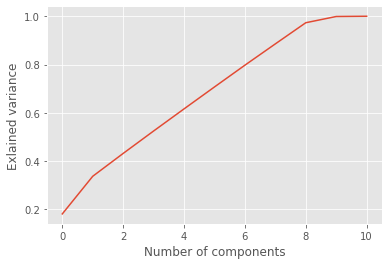

In [49]:
plt.plot(np.cumsum(pca_11.explained_variance_ratio_))

plt.xlabel('Number of components')
plt.ylabel('Exlained variance')

plt.savefig('elbow_plot.png', dpi=100)

# Scree plot explained --> 9 PC's storing 97% of variability

In [50]:
print('Variance explained by the first principal component -->', 
     np.cumsum(pca_11.explained_variance_ratio_ * 100)[0])
      
print('Variance explained by the first 2 principal component -->', 
     np.cumsum(pca_11.explained_variance_ratio_ * 100)[1])

print('Variance explained by the first 3 principal component -->', 
     np.cumsum(pca_11.explained_variance_ratio_ * 100)[2])

print('Variance explained by the first 9 principal component -->', 
     np.cumsum(pca_11.explained_variance_ratio_ * 100)[8])

Variance explained by the first principal component --> 18.134039109944457
Variance explained by the first 2 principal component --> 33.722114126630366
Variance explained by the first 3 principal component --> 43.18775088523985
Variance explained by the first 9 principal component --> 97.3159091218739


In [51]:
pc_9 = PCA(n_components=9, random_state=2020)
pc_9.fit(d_scaled)
var_pca9 = pc_9.transform(d_scaled)

pc_9_var = pc_9.explained_variance_ratio_ * 100

reduced_df = pd.DataFrame(pc_9_var.round(2), columns=['Captured Variance per PC'],
                      index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])

reduced_df

,Captured Variance per PC
PC1,18.13
PC2,15.59
PC3,9.47
PC4,9.28
PC5,9.16
PC6,9.09
PC7,9.02
PC8,8.82
PC9,8.76


# Heatmap

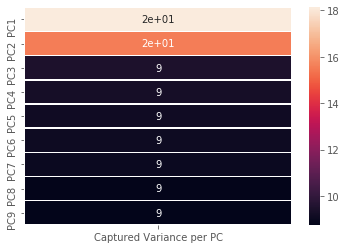

In [52]:
sns.heatmap(reduced_df, annot=True, linewidth=0.5,fmt='.1g')

# Two dimensions captured 33.72% of the variability 

In [53]:
pca2 = PCA(n_components=2, random_state=2020)

pca2.fit(d_scaled)

trans_pca2 = pca2.transform(d_scaled)

In [54]:
pc2 = pd.DataFrame(data = trans_pca2, columns=['pc1', 'pc2'])
pc2

,pc1,pc2
0,-1.145870,0.611390
1,-0.814600,0.570869
2,-1.629136,0.682331
3,-1.829590,1.014149
4,-2.088815,-1.799377
...,...,...
9995,0.770407,-1.495210
9996,2.060647,2.597149
9997,1.858934,-0.282271
9998,1.437575,-1.019076


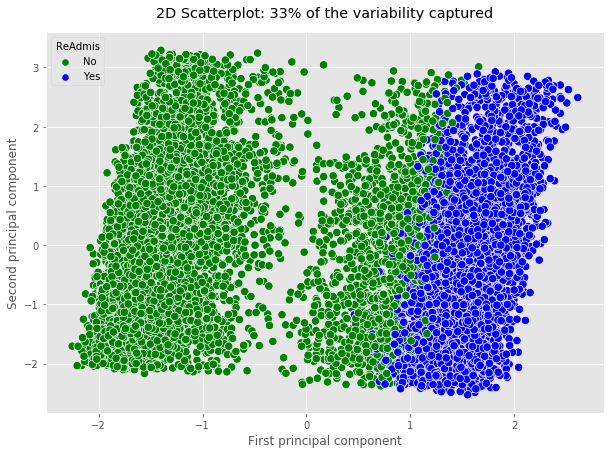

In [55]:
plt.figure(figsize=(10,7))

sns.scatterplot(x=trans_pca2[:,0], y=trans_pca2[:,1], s=70,
               hue=med['ReAdmis'], palette=('green', 'blue'))

plt.title('2D Scatterplot: 33% of the variability captured', pad=15)

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.savefig('2d_scatterplot.png')

# 3 dimenstions capture 43% variability of the original data

In [56]:
pca3 = PCA(n_components=3,random_state=2020)
pca3.fit(d_scaled)
trans_pca3 = pca3.transform(d_scaled)

In [58]:
var_df3 = pca3.explained_variance_ratio_ * 100

reduced_df3 = pd.DataFrame(var_df3.round(2), columns=['Explained Variance'],
                          index=['PC1','PC2','PC3'])

reduced_df3

,Explained Variance
PC1,18.13
PC2,15.59
PC3,9.47
